### Leer Datos

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('data/incidentes-viales-c5.csv')
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [3]:
data.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

In [4]:
data.nunique(axis = 0)

folio                1383138
fecha_creacion          2637
hora_creacion         105887
dia_semana                 7
codigo_cierre              5
fecha_cierre            2621
año_cierre                 7
mes_cierre                12
hora_cierre           106827
delegacion_inicio         16
incidente_c4              26
latitud                82501
longitud               78984
clas_con_f_alarma          4
tipo_entrada               9
delegacion_cierre         16
geopoint              134288
mes                       12
dtype: int64

### Cambiar el tipo de variable según corresponda

In [5]:
data_clean = data.copy(deep = True) #Copy deep para que los cambios hechos a data_clean no se vean reflejados en data

#Existen renglones en los que el formato de fecha es "dd/mm/aa" en vez de "dd/mm/aaaa", para ambias variables de fecha
#Corregimos esto mediante:

data_clean['fecha_creacion'] = data['fecha_creacion'].replace("/19$", "/2019", regex = True, inplace = False) 
data_clean['fecha_creacion'] = data_clean['fecha_creacion'].replace("/18$", "/2018", regex = True, inplace = False) 
data_clean['fecha_cierre'] = data['fecha_cierre'].replace("/19$", "/2019", regex = True, inplace = False) 
data_clean['fecha_cierre'] = data_clean['fecha_cierre'].replace("/18$", "/2018", regex = True, inplace = False) 


In [6]:
#Convertir en fecha las variables correspondientes
data_clean['fecha_creacion'] = pd.to_datetime(data_clean['fecha_creacion'], format = '%d/%m/%Y')
data_clean['fecha_cierre'] = pd.to_datetime(data_clean['fecha_cierre'], format = '%d/%m/%Y')

#Transformar a minusculas las delegaciones
data_clean['delegacion_inicio'] = data.delegacion_inicio.str.lower()
data_clean['delegacion_cierre'] = data.delegacion_cierre.str.lower()

## Modificar incidente c4
#Quitar mayúsculas
data_clean['incidente_c4'] = data_clean['incidente_c4'].str.lower()
#Quitar acentos
data_clean['incidente_c4'] = data_clean['incidente_c4'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#Quitar " /"
data_clean['incidente_c4'] = data_clean['incidente_c4'].str.replace(' /','', regex =  True)
#Cambiar espacios y "-" por "_"
data_clean['incidente_c4'] = data_clean['incidente_c4'].str.replace('\-|\s','_', regex =  True)

#Conservar únicamente la letra del codigo_cierre
data_clean['codigo_cierre'] = data_clean['codigo_cierre'].str.extract(r'(\(.\))')
data_clean['codigo_cierre'] = data_clean['codigo_cierre'].str.replace('\(|\)', '', regex = True)

#Eliminar la columna "geopoint" pues ya tenemos long. y lat.
data_clean.drop(columns = ['geopoint'], inplace = True)

#Ordenar por delegacion_cierre
data_clean.sort_values(by = ['delegacion_cierre', 'fecha_creacion'], inplace = True)

data_clean.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes
1164271,C4/131231/03508,2013-12-31,23:21:38,Martes,A,2014-01-01,2014,Enero,01:01:03,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,1
1164423,C4/131231/02371,2013-12-31,18:21:47,Martes,N,2014-01-02,2014,Enero,00:26:07,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,1
372612,C4/140101/04189,2014-01-01,21:45:43,Miércoles,A,2014-01-01,2014,Enero,23:55:59,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,1
372622,C4/140101/04201,2014-01-01,21:46:46,Miércoles,A,2014-01-01,2014,Enero,21:53:16,alvaro obregon,accidente_choque_sin_lesionados,19.36348,-99.19145,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,1
372628,C4/140101/01293,2014-01-01,06:50:48,Miércoles,A,2014-01-01,2014,Enero,08:45:49,alvaro obregon,accidente_choque_sin_lesionados,19.38161,-99.20009,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,1


Crearemos una columna que contenga la fecha y la hora como formato datetime

In [7]:
data_clean['dttm_creacion'] = pd.to_datetime(data_clean.fecha_creacion.astype(str).str.cat(data_clean.hora_creacion, sep = ' '), errors= 'coerce')

Sin embargo, esto causa errores en algunos renglones. Veamos a qué se debe:

In [8]:
data_clean[data_clean.dttm_creacion.isna()].hora_creacion.astype(float)

831395     0.926343
1312526    0.941921
1312707    0.716968
831371     0.553137
831439     0.595359
             ...   
1382235    0.844595
1382255    0.362477
1382287    0.457523
1382321    0.913322
1382333    0.826088
Name: hora_creacion, Length: 1544, dtype: float64

In [9]:
data_clean[data_clean.dttm_creacion.isna()].hora_creacion.astype(float).min()

0.000138889

In [10]:
data_clean[data_clean.dttm_creacion.isna()].hora_creacion.astype(float).max()

0.99994213

Vemos que los decimales estan en el intervalo [0,1], por lo que el formato en realidad es una fracción de las 24 horas. Utilzamos pandas.to_timedelta para solucionarlo

In [11]:
data_clean.loc[data_clean.dttm_creacion.isna(), 'dttm_creacion']= (data_clean[data_clean.dttm_creacion.isna()]['fecha_creacion'] + pd.to_timedelta(data_clean[data_clean.dttm_creacion.isna()].hora_creacion.astype(float), 'days'))

Hacemos lo mismo con dttm_cierre

In [12]:
data_clean['dttm_cierre'] = pd.to_datetime(data_clean.fecha_cierre.astype(str).str.cat(data_clean.hora_cierre, sep = ' '), errors= 'coerce')

data_clean.loc[data_clean.dttm_cierre.isna(), 'dttm_cierre']= (data_clean[data_clean.dttm_cierre.isna()]['fecha_cierre'] + pd.to_timedelta(data_clean[data_clean.dttm_cierre.isna()].hora_cierre.astype(float), 'days'))

Corroboramos que funcionó

In [13]:
data_clean.isna().sum()

folio                  0
fecha_creacion         0
hora_creacion          0
dia_semana             0
codigo_cierre          0
fecha_cierre           0
año_cierre             0
mes_cierre             0
hora_cierre            0
delegacion_inicio    158
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre    140
mes                    0
dttm_creacion          0
dttm_cierre            0
dtype: int64

In [14]:
data_clean.dtypes

folio                        object
fecha_creacion       datetime64[ns]
hora_creacion                object
dia_semana                   object
codigo_cierre                object
fecha_cierre         datetime64[ns]
año_cierre                    int64
mes_cierre                   object
hora_cierre                  object
delegacion_inicio            object
incidente_c4                 object
latitud                     float64
longitud                    float64
clas_con_f_alarma            object
tipo_entrada                 object
delegacion_cierre            object
mes                           int64
dttm_creacion        datetime64[ns]
dttm_cierre          datetime64[ns]
dtype: object

Teniendo las columnas datetime, podemos eliminar el resto de las variables relacionadas con el tiempo, pues podremos crearlas según sea necesario.

In [15]:
data_clean.drop(columns = ['fecha_creacion', 'hora_creacion', 'dia_semana','fecha_cierre', 'año_cierre', 'mes_cierre', 'hora_cierre', 'mes'], inplace = True)

In [16]:
data_clean.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,dttm_cierre
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2013-12-31 23:21:38,2014-01-01 01:01:03
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2013-12-31 18:21:47,2014-01-02 00:26:07
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:45:43,2014-01-01 23:55:59
372622,C4/140101/04201,A,alvaro obregon,accidente_choque_sin_lesionados,19.36348,-99.19145,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:46:46,2014-01-01 21:53:16
372628,C4/140101/01293,A,alvaro obregon,accidente_choque_sin_lesionados,19.38161,-99.20009,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 06:50:48,2014-01-01 08:45:49


### Ver valores faltantes

In [17]:
data_clean.isna().sum()

folio                  0
codigo_cierre          0
delegacion_inicio    158
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre    140
dttm_creacion          0
dttm_cierre            0
dtype: int64

#### Valores faltantes en delegacion_inicio

Veamos a qué se deben los NAs en delegacion.
Lo observamos en la data original para descartar que los NAs hayan sido causados por la transformación de las columnas

In [18]:
data[data.delegacion_inicio.isna()].clas_con_f_alarma.value_counts()

FALSA ALARMA         140
EMERGENCIA             9
URGENCIAS MEDICAS      9
Name: clas_con_f_alarma, dtype: int64

Vemos que cuando la delegacion de inicio y delegacion de cierre son NA's al mismo tiempo, es porque se tiene una falsa alarma

Veamos el resto de los casos:

In [19]:
data[(data.delegacion_inicio.isna())&(data.clas_con_f_alarma != "FALSA ALARMA")]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
279857,C5/180822/03110,22/08/2018,09:31:00,Miércoles,(D) El incidente reportado se registró en dos ...,22/08/2018,2018,Agosto,09:44:00,NaN,lesionado-atropellado,19.456380,-99.215270,URGENCIAS MEDICAS,ZELLO,MIGUEL HIDALGO,"19.45638,-99.21526992",8
432516,C5/180902/10676,02/09/2018,20:55:34,Domingo,(A) La unidad de atención a emergencias fue de...,03/09/2018,2018,Septiembre,01:41:09,NaN,accidente-choque con lesionados,19.434509,-99.087715,URGENCIAS MEDICAS,RADIO,VENUSTIANO CARRANZA,"19.434509,-99.087715",9
432593,C5/180904/06600,04/09/2018,17:08:57,Martes,(D) El incidente reportado se registró en dos ...,04/09/2018,2018,Septiembre,17:18:31,NaN,accidente-choque con lesionados,19.448690,-99.075480,URGENCIAS MEDICAS,ZELLO,GUSTAVO A. MADERO,"19.44869004,-99.07548012",9
724961,C5/180810/05668,10/08/2018,15:40:00,Viernes,(D) El incidente reportado se registró en dos ...,10/08/2018,2018,Agosto,16:02:00,NaN,accidente-choque sin lesionados,19.448690,-99.075480,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.44869004,-99.07548012",8
725605,C5/180811/01836,11/08/2018,05:15:00,Sábado,(A) La unidad de atención a emergencias fue de...,11/08/2018,2018,Agosto,05:48:00,NaN,accidente-choque sin lesionados,19.502880,-99.157130,EMERGENCIA,LLAMADA DEL 911,GUSTAVO A. MADERO,"19.50288003,-99.15712992",8
757942,C5/180825/00026,25/08/2018,00:02:00,Sábado,(N) La unidad de atención a emergencias fue de...,25/08/2018,2018,Agosto,02:41:00,NaN,accidente-choque sin lesionados,19.418100,-99.074390,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.41810003,-99.07439004",8
760762,GA/180831/06257,31/08/2018,15:40:30,Viernes,(A) La unidad de atención a emergencias fue de...,31/08/2018,2018,Agosto,18:04:04,NaN,accidente-motociclista,19.461880,-99.056060,URGENCIAS MEDICAS,RADIO,GUSTAVO A. MADERO,"19.46187999,-99.05605992",8
762401,C5/180819/10229,19/08/2018,18:45:00,Domingo,(D) El incidente reportado se registró en dos ...,19/08/2018,2018,Agosto,19:15:00,NaN,accidente-choque sin lesionados,19.448690,-99.075480,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.44869004,-99.07548012",8
763211,C5/180821/10003,21/08/2018,21:58:00,Martes,(A) La unidad de atención a emergencias fue de...,21/08/2018,2018,Agosto,22:14:00,NaN,accidente-vehiculo atrapado,19.530970,-99.171790,EMERGENCIA,ZELLO,GUSTAVO A. MADERO,"19.53097002,-99.17178984",8
764090,C5/180810/02590,10/08/2018,09:50:00,Viernes,(A) La unidad de atención a emergencias fue de...,10/08/2018,2018,Agosto,12:19:00,NaN,accidente-choque sin lesionados,19.417450,-99.076040,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.41744996,-99.07603992",8


Cuando se tiene que delegacion_inicio es NA y que NO es una falsa alarma, entonces sí se tiene un valor en delegacion_cierre. Se propone utilizar el valor de delegacion_cierre para imputar los valores faltantes de delegacion_inicio

#### Longitud y latitud

Veamos ahora los valores faltantes en longitud y latitud

In [20]:
data[(data.longitud.isna()) & (data.latitud.isna())]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
284050,C5/181231/02925,31/12/2018,10:52:07,Lunes,(N) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,11:25:43,COYOACAN,accidente-choque sin lesionados,NaN,NaN,EMERGENCIA,LLAMADA DEL 911,COYOACAN,NaN,12
284051,C5/181231/06798,31/12/2018,18:28:05,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,18:51:17,CUAUHTEMOC,accidente-choque con lesionados,NaN,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
284052,C5/181231/02638,31/12/2018,10:15:06,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,12:34:37,TLAHUAC,accidente-choque con lesionados,NaN,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,TLAHUAC,NaN,12
284053,C5/181231/08158,31/12/2018,21:09:53,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,21:12:53,AZCAPOTZALCO,lesionado-atropellado,NaN,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
284054,C5/181231/07818,31/12/2018,20:27:37,Lunes,(N) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,20:46:21,ALVARO OBREGON,accidente-choque sin lesionados,NaN,NaN,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714663,C5/181231/08750,31/12/2018,22:01:23,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,22:32:17,GUSTAVO A. MADERO,accidente-motociclista,NaN,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,GUSTAVO A. MADERO,NaN,12
714665,C5/181231/02598,31/12/2018,10:09:23,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,10:14:18,IZTAPALAPA,accidente-choque sin lesionados,NaN,NaN,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,NaN,12
714667,C5/181231/07779,31/12/2018,20:20:43,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,20:22:20,COYOACAN,lesionado-atropellado,NaN,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,COYOACAN,NaN,12
714695,C5/181231/06803,31/12/2018,18:27:50,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,18:34:55,CUAUHTEMOC,detención ciudadana-atropellado,NaN,NaN,DELITO,LLAMADA DEL 911,CUAUHTEMOC,NaN,12


In [21]:
data[(data.longitud.isna()) & (data.latitud.notna())]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
284145,C5/181231/06094,31/12/2018,17:03:39,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,17:21:08,BENITO JUAREZ,accidente-motociclista,193.815,NaN,URGENCIAS MEDICAS,LLAMADA DEL 911,BENITO JUAREZ,NaN,12
436981,C5/181231/06971,31/12/2018,18:46:55,Lunes,(N) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,19:00:13,IZTAPALAPA,accidente-choque sin lesionados,193.446,NaN,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,NaN,12
714661,GA/181231/04533,31/12/2018,14:15:47,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,17:16:38,GUSTAVO A. MADERO,accidente-choque sin lesionados,195.303,NaN,EMERGENCIA,BOTÓN DE AUXILIO,GUSTAVO A. MADERO,NaN,12


In [22]:
data[(data.longitud.notna()) & (data.latitud.isna())]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
284110,C5/181231/01210,31/12/2018,06:02:10,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,06:05:35,IZTAPALAPA,accidente-motociclista,NaN,-990.369,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,NaN,12
284125,C5/181231/05350,31/12/2018,15:42:11,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:50:06,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
436964,C5/181231/06210,31/12/2018,17:18:40,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,19:09:52,IZTACALCO,accidente-motociclista,NaN,-990.765,URGENCIAS MEDICAS,RADIO,IZTACALCO,NaN,12
436990,C5/181231/01068,31/12/2018,04:51:42,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,05:18:29,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
437000,C5/181231/05354,31/12/2018,15:42:14,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:49:03,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
437042,C5/181231/05353,31/12/2018,15:41:59,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:49:27,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
437075,C5/181231/00961,31/12/2018,04:08:37,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,04:18:48,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
714449,C5/181231/05744,31/12/2018,16:22:20,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,18:10:39,IZTAPALAPA,accidente-choque sin lesionados,NaN,-990.495,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,NaN,12
714483,C5/181231/00956,31/12/2018,04:06:15,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,06:22:55,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
714513,C5/181231/04311,31/12/2018,13:34:03,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,16:01:07,TLAHUAC,accidente-choque sin lesionados,NaN,-989.595,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,NaN,12


In [23]:
data[(data.longitud.isna())  | (data.latitud.isna())].isna().sum()

folio                  0
fecha_creacion         0
hora_creacion          0
dia_semana             0
codigo_cierre          0
fecha_cierre           0
año_cierre             0
mes_cierre             0
hora_cierre            0
delegacion_inicio      0
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre      0
geopoint             446
mes                    0
dtype: int64

Vemos que NO siempre faltan ambos puntos de coordenadas, pero siempre que falta alguno, la variable "geopoint" es na. En este caso, podríamos imputar los valores faltantes con el centroide de la delegación en la que se cierra.

Por lo pronto, para evitar conflictos y dado que son muy pocos los registros con datos faltantes, los eliminaremos del dataset 

In [25]:
data_clean.dropna(inplace = True)

In [26]:
data_clean.nunique()

folio                1382534
codigo_cierre              5
delegacion_inicio         16
incidente_c4              25
latitud                82478
longitud               78949
clas_con_f_alarma          4
tipo_entrada               9
delegacion_cierre         16
dttm_creacion        1366414
dttm_cierre          1369047
dtype: int64

In [27]:
data_clean.isna().sum()

folio                0
codigo_cierre        0
delegacion_inicio    0
incidente_c4         0
latitud              0
longitud             0
clas_con_f_alarma    0
tipo_entrada         0
delegacion_cierre    0
dttm_creacion        0
dttm_cierre          0
dtype: int64

In [29]:
outfile = open('cleandata','wb')
pickle.dump(data_clean,outfile)
outfile.close()

### Gráficas

KeyError: 'año_cierre'

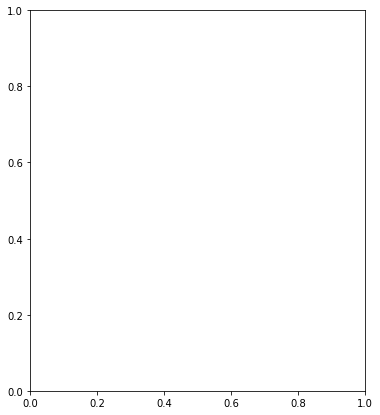

In [24]:
f = plt.subplots(figsize = (6,7))

sns.scatterplot(data = data_clean[data_clean['año_cierre'] == 2019] , y = "latitud", x = "longitud", hue = "delegacion_cierre")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
